# 数据读取

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold,train_test_split 
import os
df = []
count = 0
get_dir = os.listdir("./")  
database = pd.read_csv("/datadrive/lzy/Data/BaseData.csv")
for i in range(0,27):
    cityname = database.iloc[i,0]
    print(cityname)
    count += 1
    if count > 1:
        dfx = pd.read_excel(cityname+"_Tableurban1.xlsx")
        print(dfx.shape)
        df = df.append(dfx,ignore_index=True)
    else:
        df = pd.read_excel(cityname+"_Tableurban1.xlsx")
        print(len(df))
df.fillna(0,inplace=True)
df.info()
df.head()#看前五行
#print(df)
print(df.shape)

ALi
77
BaiShan
(172, 23)
BeiJing
(10806, 23)
ChengDu
(2823, 23)
ChongQing
(2122, 23)
FangChengGang
(384, 23)
GuangZhou
(3371, 23)
HaErBin
(4278, 23)
HaiKou
(879, 23)
HeZhou
(306, 23)
JiLin
(621, 23)
JiuQuan
(2456, 23)
LaSa
(1921, 23)
LinYi
(1798, 23)
MuDanJiang
(254, 23)
NuJiangZhou
(110, 23)
QiQiHaEr
(669, 23)
ShangHai
(7514, 23)
ShenZhen
(2208, 23)
TianMen
(358, 23)
TuLuFan
(273, 23)
WuHan
(3646, 23)
XiAn
(1850, 23)
YaAn
(332, 23)
YuLin
(964, 23)
ZhanJiang
(950, 23)
ZhaoTong
(410, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51552 entries, 0 to 51551
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    51552 non-null  int64  
 1   ID            51552 non-null  int64  
 2   PV17_weigh    51552 non-null  float64
 3   DEM_MEAN      51552 non-null  float64
 4   NDBI_MEAN     51552 non-null  float64
 5   NDVI_MEAN     51552 non-null  float64
 6   Slope_MEAN    51552 non-null  float64
 7   Road_De

In [3]:
test_df = df.iloc[:,[1,15,7,16,12,11,3,4,5,6,17,18,21,22,2]]
def normalize_feature(df):
#     """Applies function along input axis(default 0) of DataFrame."""
    return df.apply(lambda column: (column - column.mean()) / column.std()+2)#特征缩放

def get_X(df):#读取特征
#     """
#     use concat to add intersect feature to avoid side effect
#     not efficient for big dataset though
#     """
    #data = pd.concat([ones, df], axis=1)  # 合并数据，根据列合并
    ones = pd.DataFrame({'ones': np.ones(len(df))})#ones是m行1列的dataframe
    data = pd.concat([ones,df.iloc[:,1:-1]],axis=1)
    return data


def get_y(df):#读取标签
#     '''assume the last column is the target'''

    return np.array(df.iloc[:, -1])#df.iloc[:, -1]是指df的最后一列

X = get_X(test_df)
X.info()
print(X.shape, type(X))
# print(X)

y = get_y(test_df)
print(y.shape, type(y))
print(y)
#看下数据维度

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51552 entries, 0 to 51551
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ones          51552 non-null  float64
 1   yCentroid     51552 non-null  float64
 2   Road_Density  51552 non-null  float64
 3   cloudy        51552 non-null  float64
 4   RfClass_num   51552 non-null  float64
 5   EorS          51552 non-null  float64
 6   DEM_MEAN      51552 non-null  float64
 7   NDBI_MEAN     51552 non-null  float64
 8   NDVI_MEAN     51552 non-null  float64
 9   Slope_MEAN    51552 non-null  float64
 10  GDP           51552 non-null  float64
 11  population    51552 non-null  float64
 12  secondin      51552 non-null  float64
 13  vehicle       51552 non-null  float64
dtypes: float64(14)
memory usage: 5.5 MB
(51552, 14) <class 'pandas.core.frame.DataFrame'>
(51552,) <class 'numpy.ndarray'>
[     0.            0.            0.       ... 247622.466856      0.
      0.  

# 数据归一化

In [4]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
std_X = MinMaxScaler((0,10))
std_y = y.reshape(-1,1)
std_y = MinMaxScaler((0,10))

X_std = std_X.fit_transform(X)
y_std = std_y.fit_transform(y.reshape(-1,1))
X_train = std_X.fit_transform(X_train)
X_test = std_X.transform(X_test)
y_train = std_y.fit_transform(y_train.reshape(-1,1))
y_test = std_y.transform(y_test.reshape(-1,1))
print(X.shape, type(X))
print(y.shape, type(y))
print(y_std)
print(y_test,y_train)
# print(X_train,X_test)
# y_train.astype('int')

(36086, 14) (36086,)
(15466, 14) (15466,)
(51552, 14) <class 'pandas.core.frame.DataFrame'>
(51552,) <class 'numpy.ndarray'>
[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.18268578]
 [0.        ]
 [0.        ]]
[[1.08993921]
 [0.        ]
 [0.15029928]
 ...
 [0.38511792]
 [0.97937477]
 [2.04444635]] [[0.        ]
 [0.        ]
 [2.18915026]
 ...
 [0.        ]
 [2.1318104 ]
 [0.33346063]]


# 偏最小二乘法

/home/ziyu/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/_pls.py:353: UserWarning: X scores are null at iteration 13
  warnings.warn('X scores are null at iteration %s' % k)


[0.49248294875239607, 0.4474597677348011, 0.4042405257944071, 0.38851180629027365, 0.38929904646320823, 0.390601012140917, 0.39008629021433844, 0.38909011305150015, 0.389557409083347, 0.390025223345801, 0.39020448802393115, 0.3901878929479122, 0.3901861320772449, 0.3901861320772449] [0.4939049344379788, 0.5739048371054576, 0.6143909804480722, 0.6196985595242386, 0.6213143836174969, 0.6215454975494719, 0.6216742673498974, 0.6218045365189853, 0.6218962113992149, 0.6220585040578978, 0.622102254869912, 0.6221225731727471, 0.6221163012931179, 0.6221163012931179] [0.49395486434925706, 0.5739346952170922, 0.6144318464249093, 0.6197425054024375, 0.6213625929488524, 0.6215938523507116, 0.6217238844955335, 0.6218516705282575, 0.6219419797079027, 0.622104636595604, 0.6221475938535989, 0.6221677490392292, 0.6221613769373032, 0.6221613769373032] [0.4826348999464169, 0.40634341313501254, 0.3677340152747909, 0.3626724703780063, 0.3611315482219788, 0.36091114763516197, 0.3607883469916199, 0.3606641164

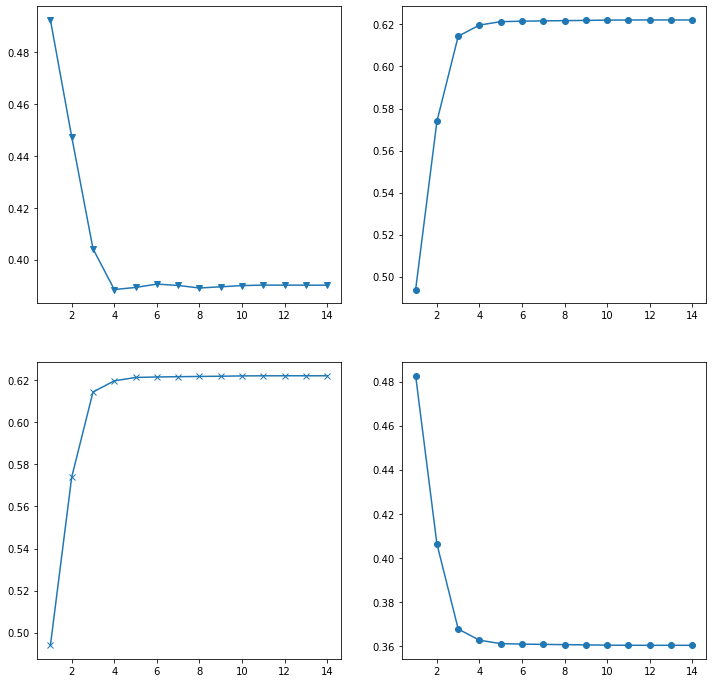

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score # not for continous data
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score

MAE=[]
R2=[]
EVS =[]
MSE=[]
for i in range(14):
    pls2 = PLSRegression(n_components=i+1)
    pls2.fit(X_train, y_train)
    Y_pred = pls2.predict(X_test)
    mae = mean_absolute_error(y_test, Y_pred)
    evs = explained_variance_score(y_test, Y_pred)
    mse = mean_squared_error(y_test, Y_pred)
#     print(pls2.y_scores_)
#     print(Y_pred)
#     print(y_test)
    r2 = r2_score(y_test,Y_pred);
    MAE.append(mae)
    R2.append(r2)
    EVS.append(evs)
    MSE.append(mse)
print(MAE,R2,EVS,MSE)
print(pls2.coef_)
a = pls2.get_params()
#交叉验证
pls2 = PLSRegression(n_components=12)
scores = cross_val_score(pls2, X_train, y_train, cv=10)
# scores = cross_val_score(pls2, X_std, y_std, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
# print(a)
fig, ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].plot(np.arange(1, (i+2)), np.array(MAE), '-v')
ax[0,1].plot(np.arange(1, (i+2)), np.array(R2), '-o')
ax[1,0].plot(np.arange(1, (i+2)), np.array(EVS), '-x')
ax[1,1].plot(np.arange(1, (i+2)), np.array(MSE), '-o')
#     fig = plt.figure(num=1, figsize=(15, 8))
#     plt.plot(Y_pred,'.')
#     plt.plot(y_test,'.',color = 'r')

# 线性回归

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score # not for continous data
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
MAE=[]
R2=[]
EVS =[]
MSE=[]

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
Y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, Y_pred)
evs = explained_variance_score(y_test, Y_pred)
mse = mean_squared_error(y_test, Y_pred)
#     print(pls2.y_scores_)
#     print(Y_pred)
#     print(y_test)
r2 = r2_score(y_test,Y_pred);
MAE.append(mae)
R2.append(r2)
EVS.append(evs)
MSE.append(mse)
# print(MAE,R2,EVS,MSE)
print(lr.coef_)
a = lr.get_params()
#交叉验证
scores = cross_val_score(lr, X_std, y_std, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


[[ 0.00000000e+00  4.57469820e-04  7.99719327e-01 -1.76426891e-02
  -6.36665838e-03  2.24764808e-03  3.76925619e-02  2.04995663e-03
  -1.48488733e-02 -5.78001190e-02  1.91342555e-02 -5.32365857e-02
   5.43074880e-03  2.81886889e-02]]
[0.60567505 0.65233809 0.64243022 0.55299579 0.69801954 0.54268587
 0.62286457 0.60938886 0.64671938 0.58862436]
Accuracy: 0.62 (+/- 0.09)


In [65]:
print('残差平方和: %.2f' % np.mean((lr.predict(X_std) - y_std) ** 2))
print('R-squared: %.2f' % lr.score(X_test, y_test))

残差平方和: 0.35
R-squared: 0.62


# 

In [80]:
from sklearn.preprocessing import PolynomialFeatures

quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = linear_model.LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
Y_pred_quadratic = regressor_quadratic.predict(X_test_quadratic)
mae_quad = mean_absolute_error(y_test, Y_pred_quadratic)
evs_quad = explained_variance_score(y_test, Y_pred_quadratic)
mse_quad = mean_squared_error(std_y.inverse_transform(y_test), std_y.inverse_transform(Y_pred_quadratic))
# xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
# plt.plot(xx, regressor_quadratic.predict(xx_quadratic), 'r-')
# plt.show()
print(X_train)
print(X_train_quadratic)
print(X_test)
print(X_test_quadratic)

cubic_featurizer = PolynomialFeatures(degree=3)
X_train_cubic = cubic_featurizer.fit_transform(X_train)
X_test_cubic = cubic_featurizer.transform(X_test)
regressor_cubic = linear_model.LinearRegression()
regressor_cubic.fit(X_train_cubic, y_train)
# xx_cubic = cubic_featurizer.transform(xx.reshape(xx.shape[0], 1))
# plt.plot(xx, regressor_cubic.predict(xx_cubic))
# plt.show()
# print(X_train_cubic)
# print(X_test_cubic)

quater_featurizer = PolynomialFeatures(degree=3)
X_train_fourth = quater_featurizer.fit_transform(X_train)
X_test_fourth = quater_featurizer.transform(X_test)
regressor_fourth = linear_model.LinearRegression()
regressor_fourth.fit(X_train_fourth, y_train)


print('1 r-squared', lr.score(X_test, y_test))
print('2 r-squared', regressor_quadratic.score(X_test_quadratic, y_test),'mae',mae_quad,'evs',evs_quad,'mse',mse_quad)
print('3 r-squared', regressor_cubic.score(X_test_cubic, y_test))
print('4 r-squared', regressor_cubic.score(X_test_cubic, y_test))

[[0.         6.45027967 0.56833555 ... 7.76286023 3.79015062 6.72727273]
 [0.         6.33628263 1.44629962 ... 3.5630736  5.40958141 4.75731895]
 [0.         8.20242507 1.4830764  ... 6.88063961 2.0217982  9.02696456]
 ...
 [0.         4.67562946 0.         ... 4.2786447  5.74630546 5.28890601]
 [0.         6.28178902 1.02657484 ... 3.5630736  5.40958141 4.75731895]
 [0.         8.28225513 0.34870828 ... 6.88063961 2.0217982  9.02696456]]
[[ 1.          0.          6.45027967 ... 14.3652417  25.49737687
  45.25619835]
 [ 1.          0.          6.33628263 ... 29.263571   25.73510415
  22.63208361]
 [ 1.          0.          8.20242507 ...  4.08766794 18.25070066
  81.48608918]
 ...
 [ 1.          0.          4.67562946 ... 33.02002642 30.39166947
  27.97252677]
 [ 1.          0.          6.28178902 ... 29.263571   25.73510415
  22.63208361]
 [ 1.          0.          8.28225513 ...  4.08766794 18.25070066
  81.48608918]]
[[0.         6.35790322 0.65115411 ... 5.28837502 4.41603932 8.8

# 多项式回归

In [74]:
#交叉验证
# ascore = accuracy_score()
scores = cross_val_score(regressor_cubic, X_train_cubic, y_train, cv=10)
print(scores)
print("3 r-squared Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(regressor_quadratic, X_train_quadratic, y_train, cv=10)
print(scores)
print("2 r-squared Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(lr, X_train, y_train, cv=10)
print(scores)
print("lr Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.67671531 0.69224307 0.57402268 0.67192646 0.66487905 0.71216268
 0.68742473 0.68793632 0.17073581 0.68381397]
3 r-squared Accuracy: 0.62 (+/- 0.31)
[0.67264375 0.67456071 0.66952918 0.67227425 0.66965242 0.70754293
 0.64426565 0.68289795 0.68793579 0.66381843]
2 r-squared Accuracy: 0.67 (+/- 0.03)
[0.63532894 0.62844076 0.64726775 0.64182889 0.63018066 0.66886952
 0.64176269 0.62772632 0.63834573 0.6292528 ]
lr Accuracy: 0.64 (+/- 0.02)


# Stochastic Gradient Descent 随机梯度下降

In [77]:
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor(loss='squared_loss',penalty="l1")
scores = cross_val_score(regressor, X_train, y_train.reshape(-1, 1), cv=5)
print('cv R', scores)
print('mean of cv R', np.mean(scores))
regressor.fit(X_train, y_train)
print('Test set R', regressor.score(X_test, y_test))
print("SGD Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

/home/ziyu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/ziyu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/ziyu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/ziyu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

cv R [0.6033019  0.64082909 0.63628469 0.61559536 0.62331283]
mean of cv R 0.6238647737062766
Test set R 0.5990369209985884
SGD Accuracy: 0.624 (+/- 0.027)
